Student Performance Indicator 

Understanding the problem 


Data Collection


Data checks to perform 


Exploratory Data Analysis 


Data Preprocessing 


Model Training 


Choosing the best model 

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("data/stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Check the Stastics oof the data set 

In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print(df.isna().sum())

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


There are no missing values in the dataset 

In [13]:
df.shape

(1000, 8)

In [14]:
df.duplicated().sum()

0

There are no duplicate elements in the data set 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique values of each column 

In [16]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
print('Categories in gender variable:',end=" ")
print(df['gender'].unique())

print('Categories in Race variables',end=" ")
print(df['race_ethnicity'].unique())

print('Categories in Parental Level of Education',end=" ")
print(df['parental_level_of_education'].unique())

print('Categories of Lunch in variable',end=" ")
print(df['lunch'].unique())

print('Categories of Test Prep Course',end=" ")
print(df['test_preparation_course'].unique())

Categories in gender variable: ['female' 'male']
Categories in Race variables ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in Parental Level of Education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories of Lunch in variable ['standard' 'free/reduced']
Categories of Test Prep Course ['none' 'completed']


In [24]:
#define numeric and categorical columns

numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categoric_features=[feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features :{}'.format(len(categoric_features),categoric_features))


We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding Columns for Total Score and Average Score 

In [30]:
df['total_score'] =df['math_score'] + df['reading_score'] + df['writing_score']


In [31]:
df['avg_score']=df['total_score']/3


In [36]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [41]:
reading_full= df[df['reading_score']==100]['avg_score'].count()
writing_full= df[df['writing_score']==100]['avg_score'].count()
math_full= df[df['math_score']==100]['avg_score'].count()

In [43]:
print(f'No of Students with full marks in Maths:{math_full}')
print(f'No of Students with full marks in Reading:{writing_full}')
print(f'No of Students with full marks in Writing:{reading_full}')

No of Students with full marks in Maths:7
No of Students with full marks in Reading:14
No of Students with full marks in Writing:17


In [44]:
reading_less_20=df[df['reading_score']<=20]['avg_score'].count()
writing_less_20=df[df['writing_score']<=20]['avg_score'].count()
math_less_20=df[df['math_score']<=20]['avg_score'].count()

print(f'No of students with less than 20 marks in Maths :{math_less_20}')
print(f'No of students with less than 20 marks in Reading :{reading_less_20}')
print(f'No of students with less than 20 marks in Writing :{writing_less_20}')

No of students with less than 20 marks in Maths :4
No of students with less than 20 marks in Reading :1
No of students with less than 20 marks in Writing :3


From the above data :
Students performs well in reading and worst in maths  

Exploring Data (visualization)

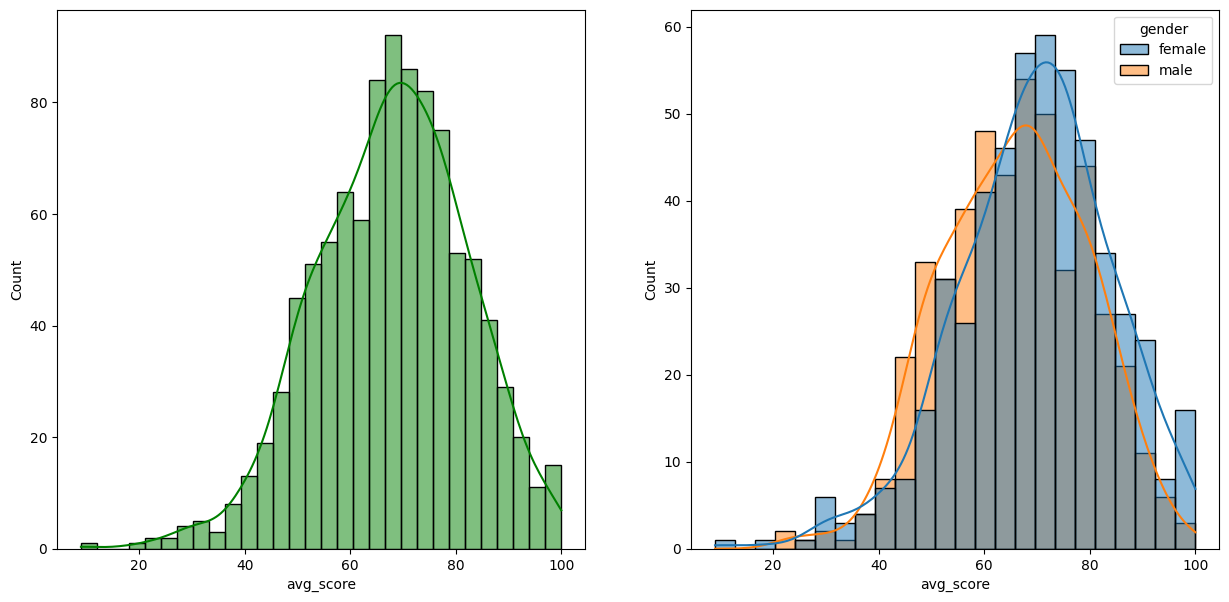

In [45]:
fig , axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='avg_score',kde=True,hue='gender')
plt.show()

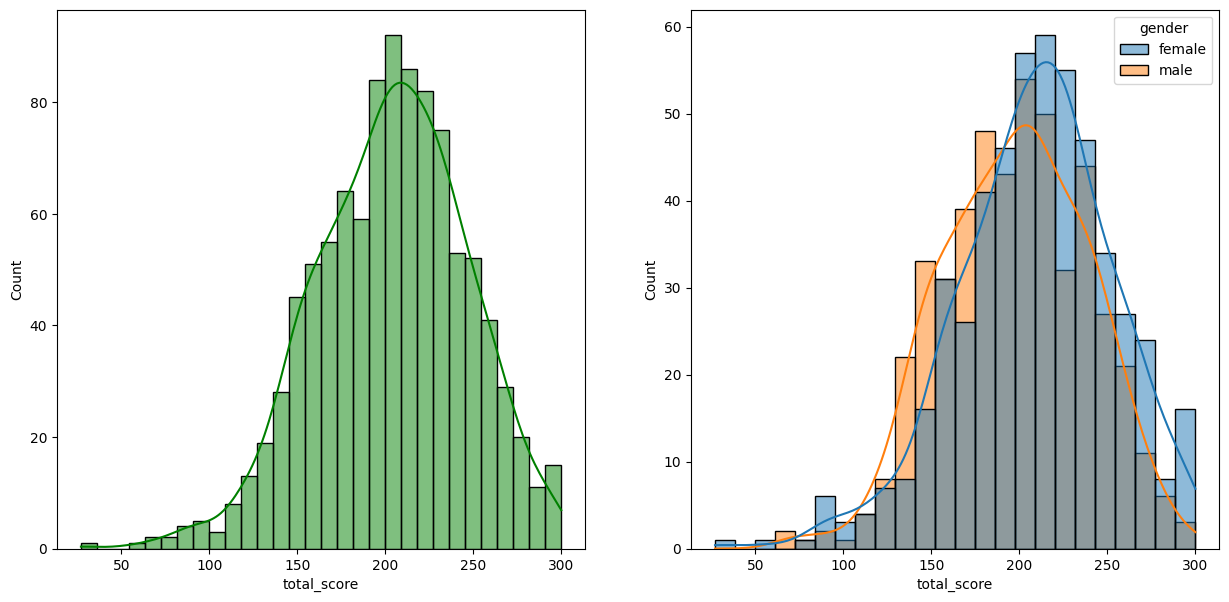

In [46]:
fig , axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

Insights:
Female students tends to perform well than male students

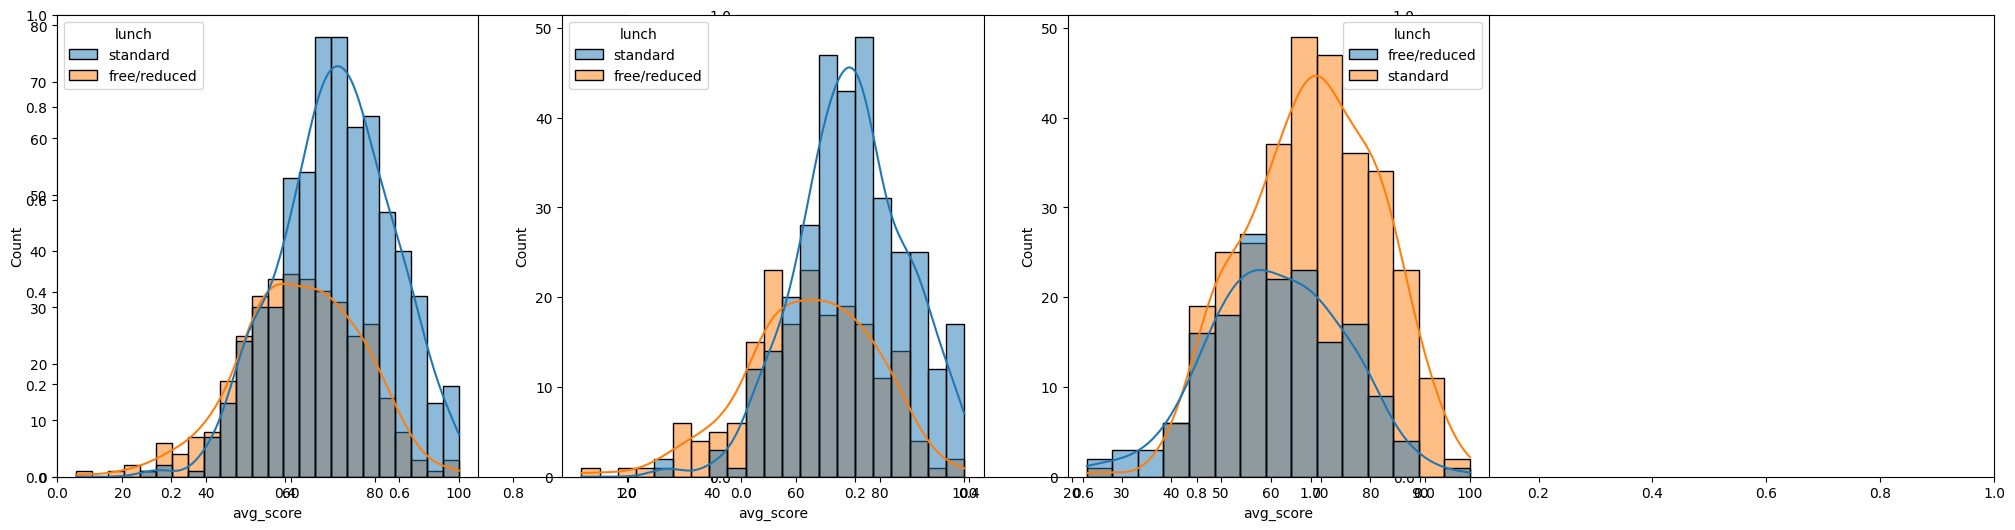

In [47]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avg_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='lunch')
plt.show()

Insights:


Standard lunch helps perform well in exams.


Standard lunch helps perform well in exams be it a male or a female.

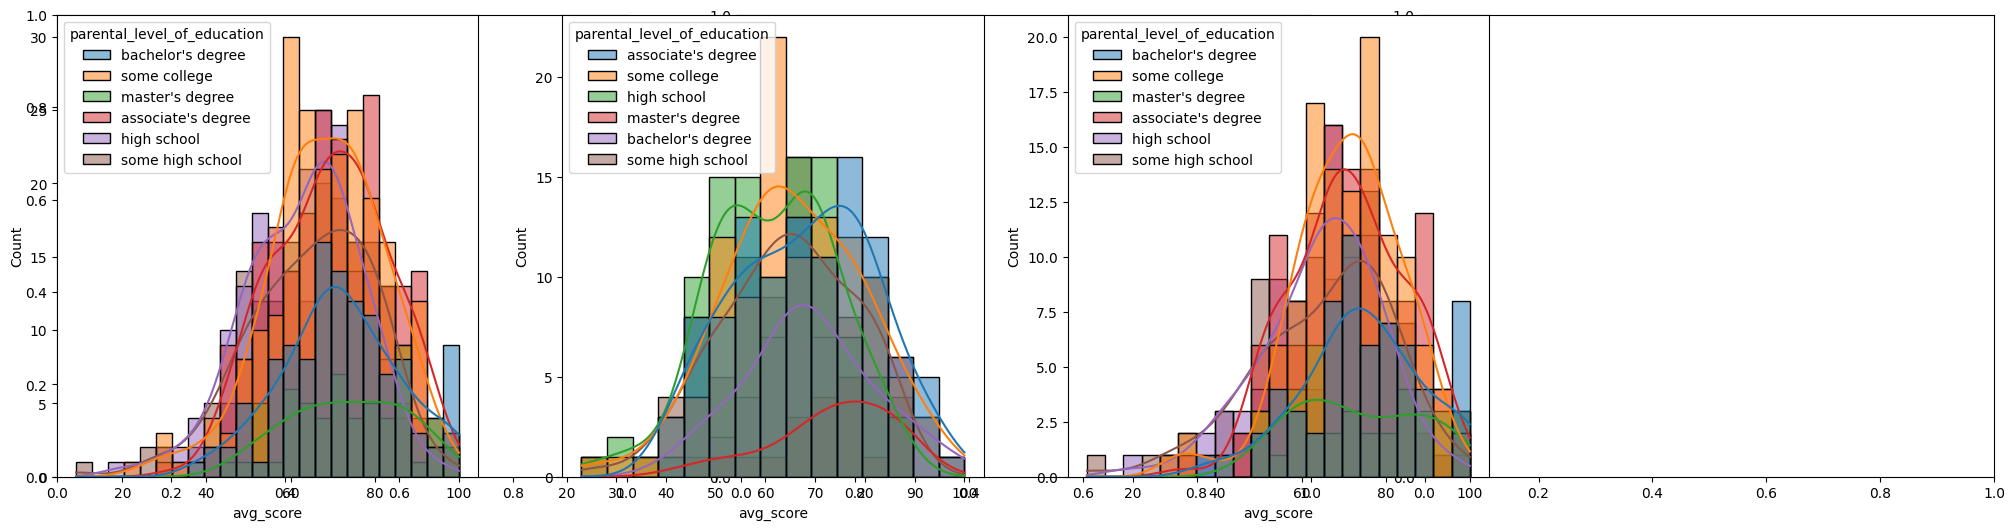

In [50]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='parental_level_of_education')
plt.show()

Insights

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.

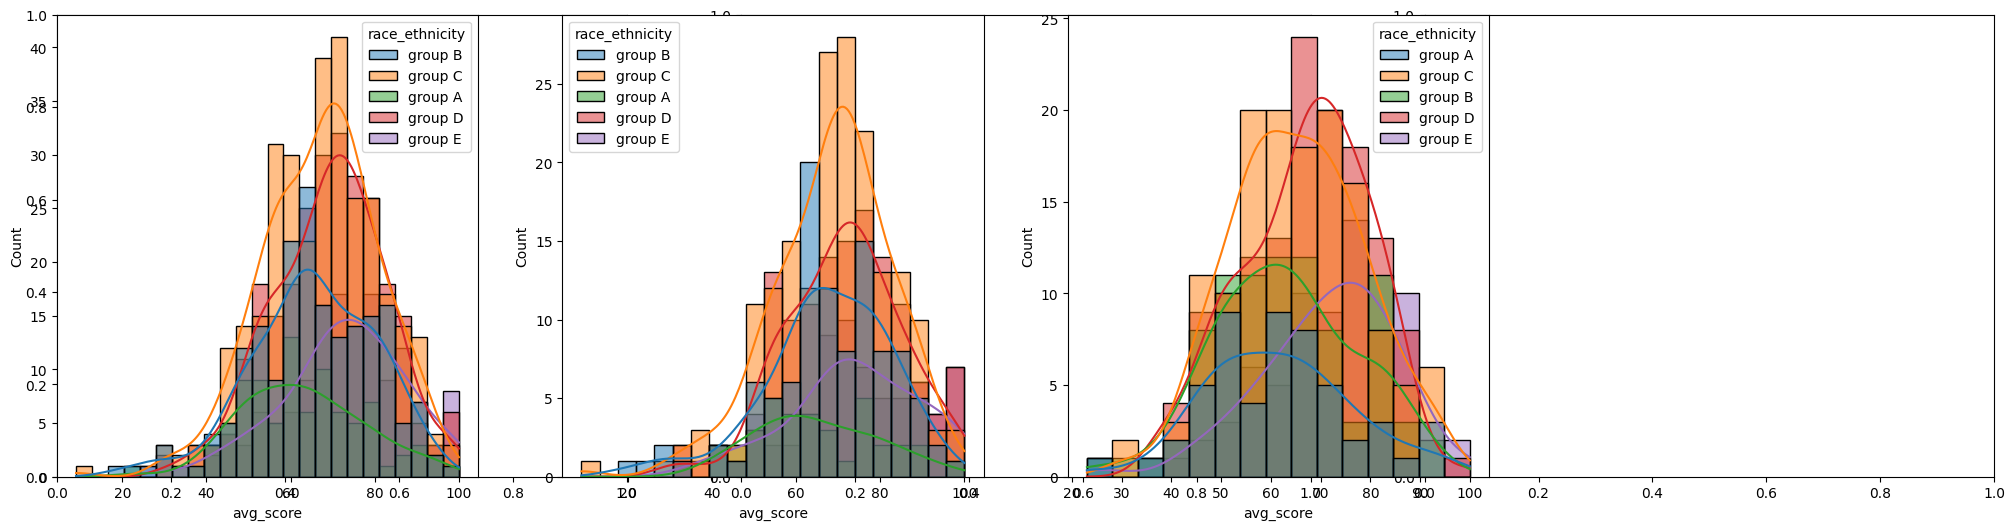

In [51]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race_ethnicity')
plt.show()

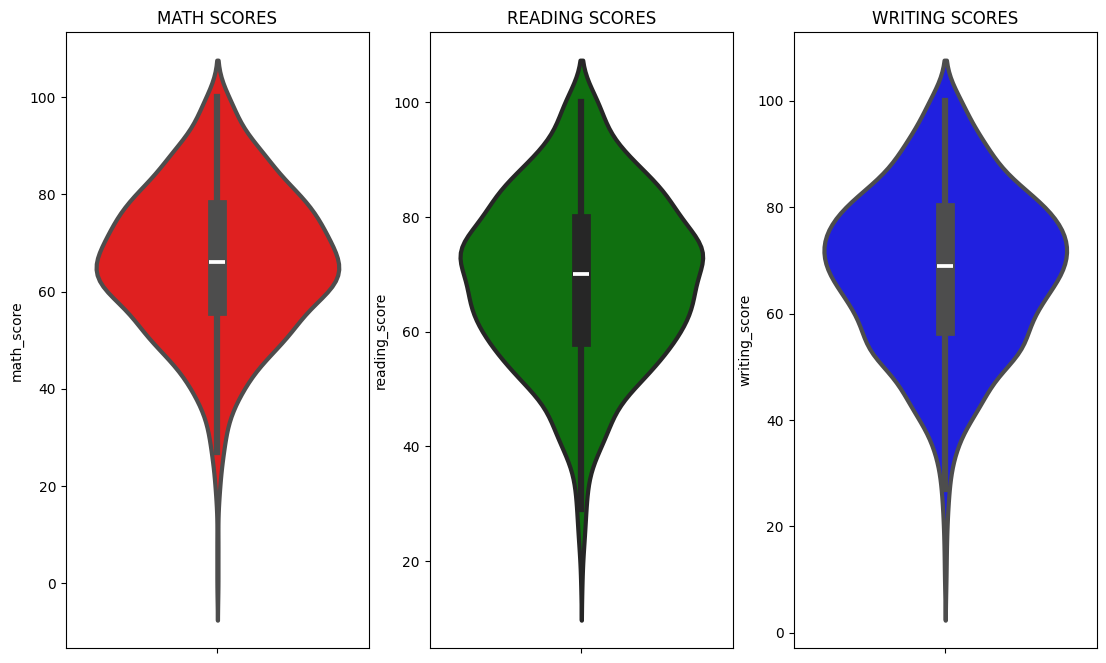

In [52]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

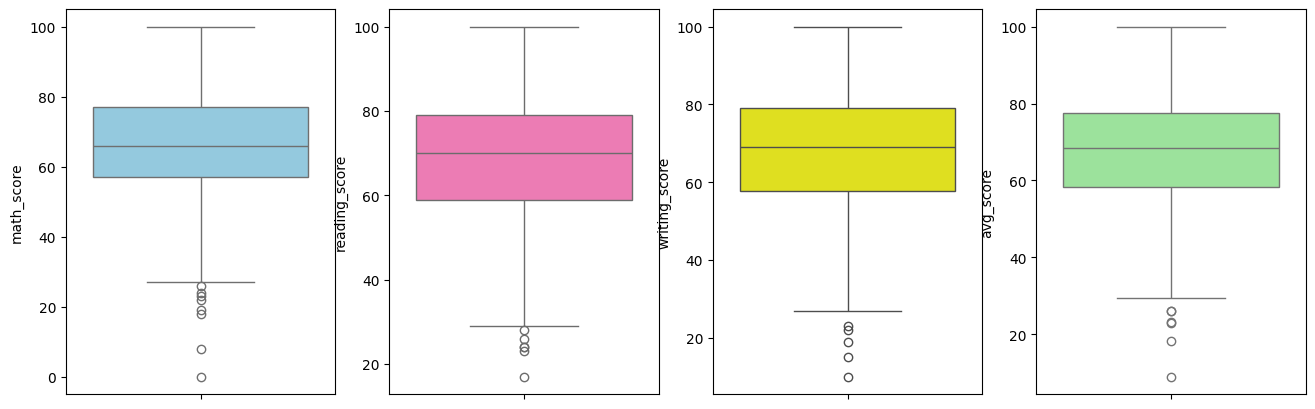

In [53]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()

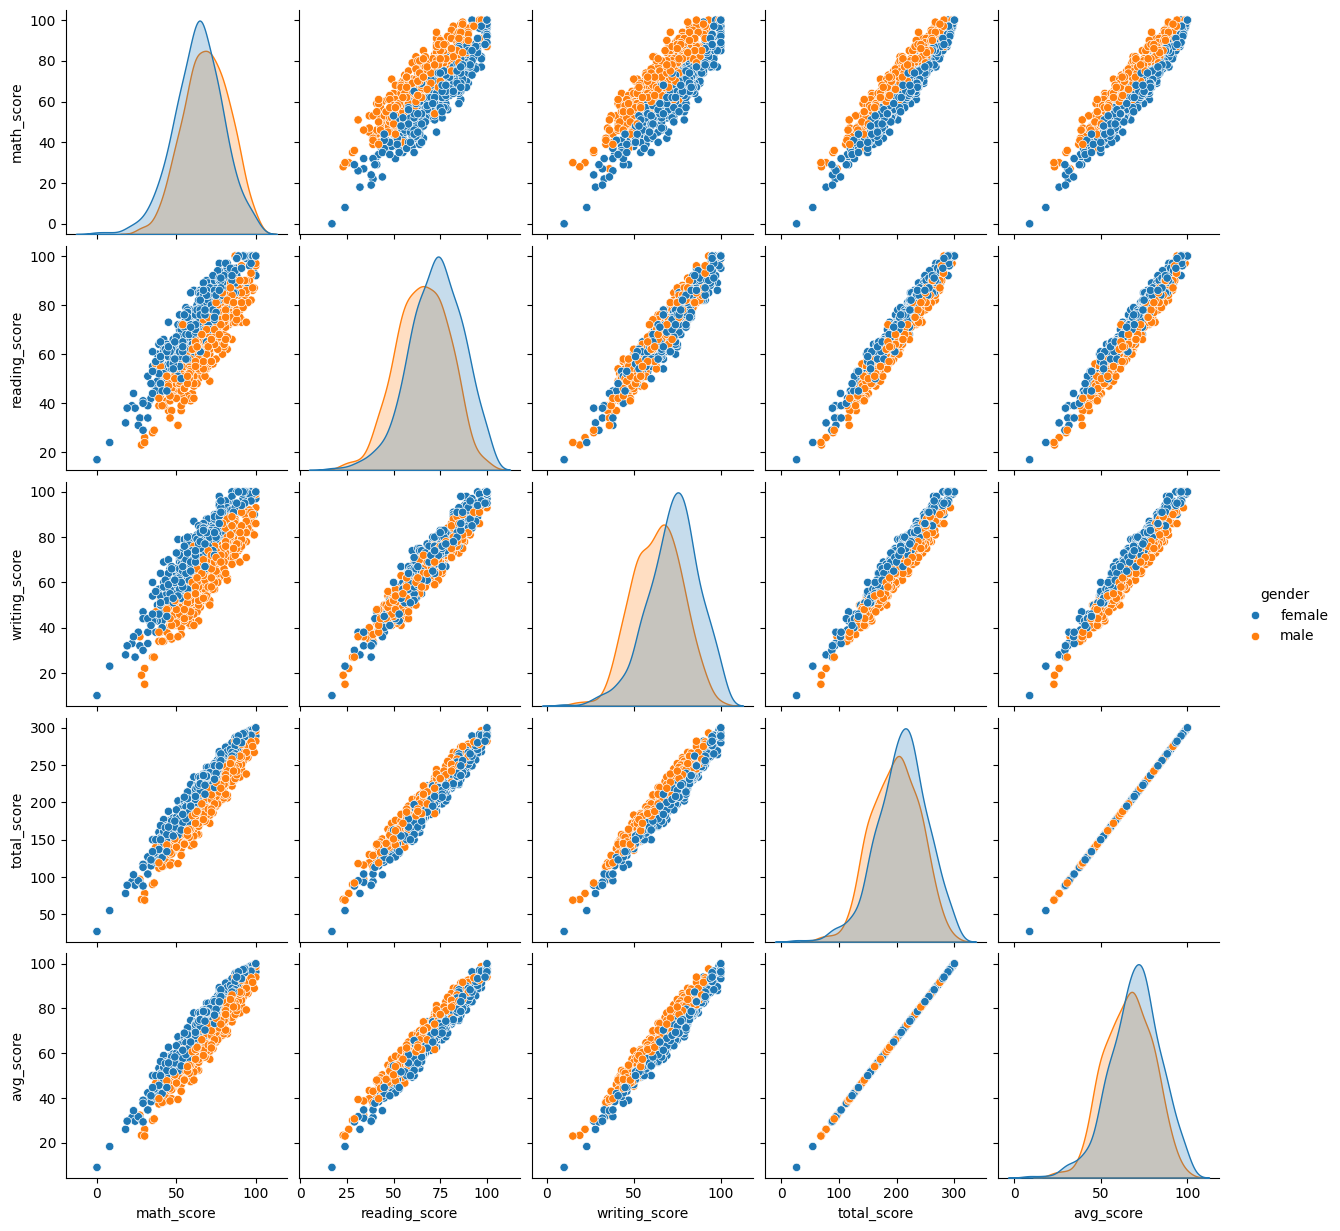

In [54]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights
From the above plot it is clear that all the scores increase linearly with each other.

Conclusions:

Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.